In [64]:
import numpy as np
from math import sqrt
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from matplotlib import colors as mcolors

px.set_mapbox_access_token("pk.eyJ1IjoiZGFuYWFiaGk3MTE5IiwiYSI6ImNrOGw5cjA1YzAwaG8zbm44d2dqMmF2cHkifQ.OttP_QaQp-BDSzQY5qBf1w")

pyo.init_notebook_mode()


%matplotlib inline

class style:
   BOLD = '\033[1m'
   END = '\033[0m'

In [8]:
confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
death = pd.read_csv("time_series_covid_19_deaths.csv")
recover = pd.read_csv("time_series_covid_19_recovered.csv")

In [9]:
confirm_last_date=confirmed.columns[confirmed.columns.size-1]
print(confirm_last_date)

4/3/20


In [74]:
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum()

In [75]:
confirmedcountry

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,91,107,107,119,119,135,135,143,146,153
177,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,141,153,163,174,188,203,212,218,233,237
178,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,...,59,84,91,98,109,116,119,134,161,194
179,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,12,16,22,28,29,35,35,36,39,39


In [76]:
#order countries by cases
ccs=confirmedcountry.sort_values(by=confirm_last_date, ascending=False).head(10)
print(style.BOLD + '\nConfirmed Cases\n' + style.END) 
print("---------------\n")
print(ccs[['Country/Region',confirm_last_date]].to_string(index=False))


Confirmed Cases

---------------

 Country/Region  4/3/20
             US  275586
          Italy  119827
          Spain  119199
        Germany   91159
          China   82511
         France   65202
           Iran   53183
 United Kingdom   38689
         Turkey   20921
    Switzerland   19606


In [77]:
death_last_date = death.columns[death.columns.size-1]

In [78]:
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [79]:
#order countries by deaths 
dcs=deathcountry.sort_values(by=death_last_date, ascending=False).head(10)
print(style.BOLD + '\nDeaths\n' + style.END) 
print("---------------\n")

print(dcs[['Country/Region',death_last_date]].to_string(index=False))


Deaths

---------------

 Country/Region  4/3/20
          Italy   14681
          Spain   11198
             US    7087
         France    6520
 United Kingdom    3611
          China    3326
           Iran    3294
    Netherlands    1490
        Germany    1275
        Belgium    1143


In [80]:
recover_last_date = recover.columns[recover.columns.size-1]

In [81]:
recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [82]:
#order countries by recoveries 
rcs=recovercountry.sort_values(by=recover_last_date, ascending=False).head(10)
print(style.BOLD + '\nRecovers\n' + style.END) 
print("---------------\n")

print(dcs[['Country/Region',recover_last_date]].to_string(index=False))


Recovers

---------------

 Country/Region  4/3/20
          Italy   14681
          Spain   11198
             US    7087
         France    6520
 United Kingdom    3611
          China    3326
           Iran    3294
    Netherlands    1490
        Germany    1275
        Belgium    1143


In [83]:
#Highest Cases By Country
countries=ccs['Country/Region'].values
print(countries)

['US' 'Italy' 'Spain' 'Germany' 'China' 'France' 'Iran' 'United Kingdom'
 'Turkey' 'Switzerland']


In [84]:
#Highest deaths By Country
dcountries=dcs['Country/Region'].values
print(dcountries)

['Italy' 'Spain' 'US' 'France' 'United Kingdom' 'China' 'Iran'
 'Netherlands' 'Germany' 'Belgium']


In [85]:
#Highest recover By Country
rcountries=rcs["Country/Region"].values
print(rcountries)

['China' 'Spain' 'Germany' 'Italy' 'Iran' 'France' 'US' 'Korea, South'
 'Switzerland' 'Belgium']


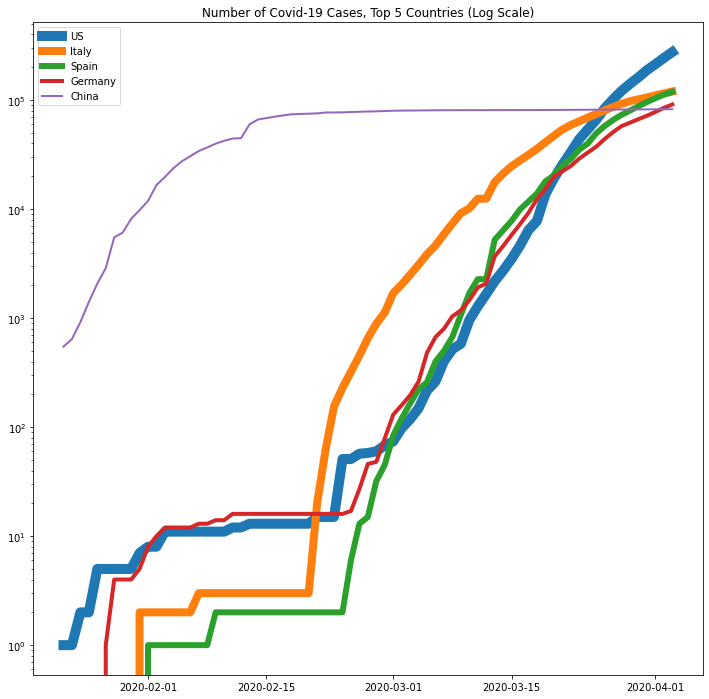

In [88]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) 
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    
    
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

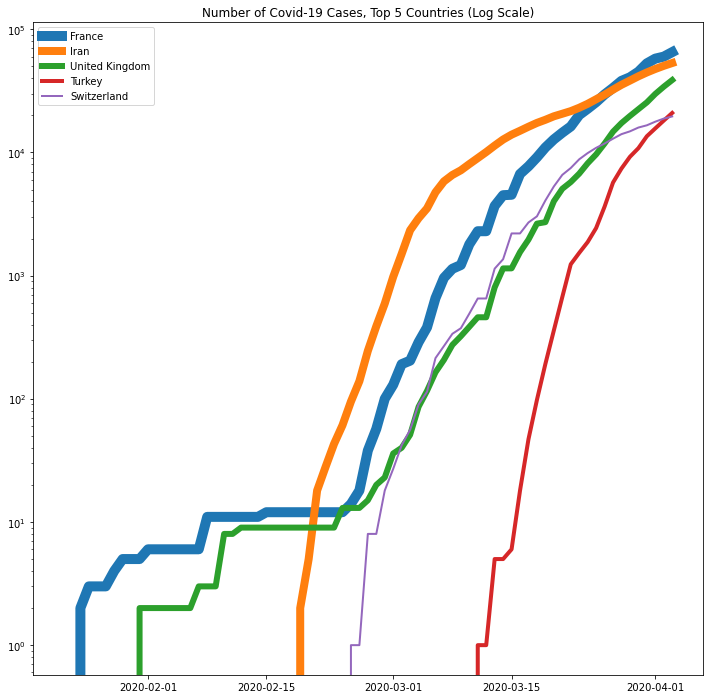

In [91]:

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

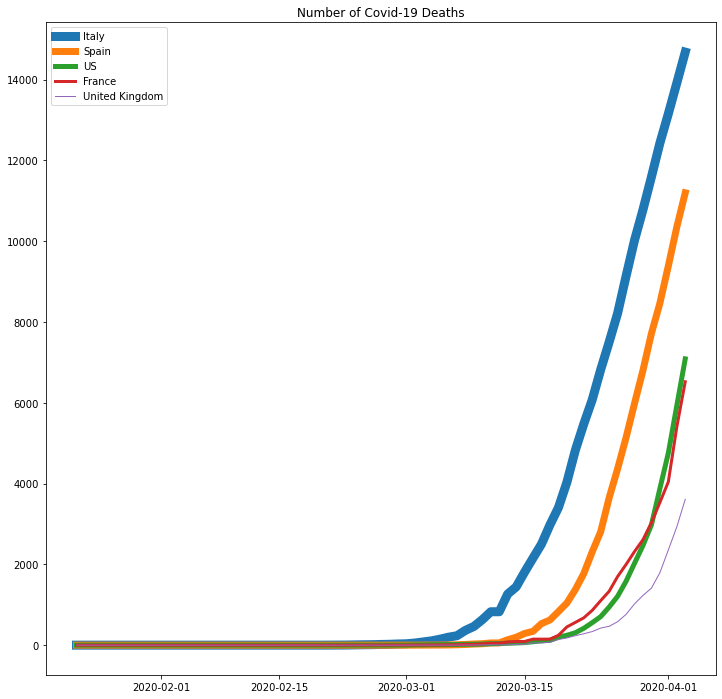

In [93]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i)
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

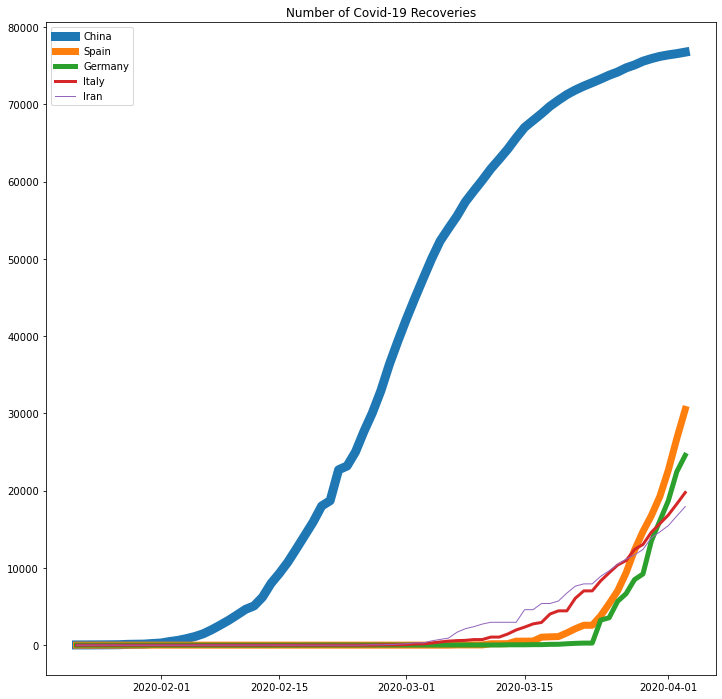

In [94]:
# top 5 countries by number of recoveries => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in rcountries[0:5]:
    scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i)
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Recoveries')
    i=i+1
plt.show()

In [135]:
long , lat = ccs['Long'], ccs['Lat']
countrynames = ccs['Country/Region']

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]




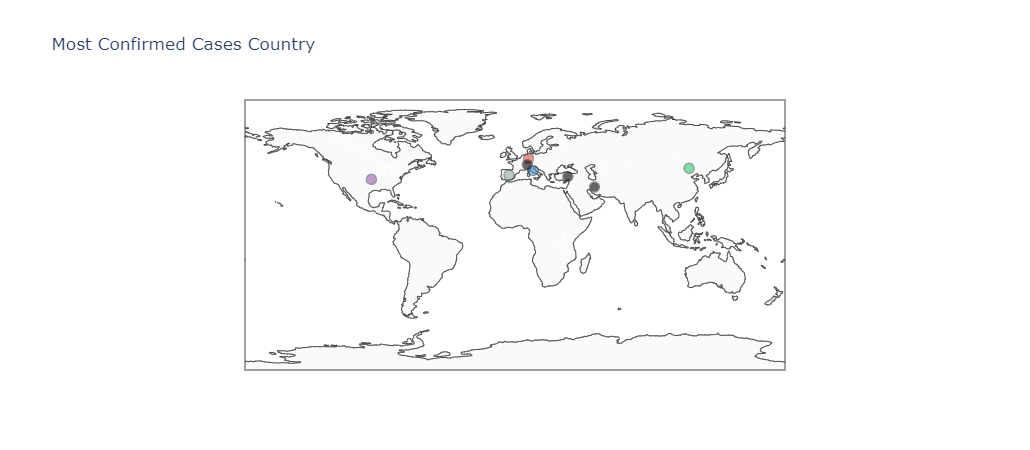

In [136]:
fig = go.Figure(data=go.Scattergeo(
        lon = long,
        lat = lat,
        text = countrynames,
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(255, 102, 255)'
            ),
            colorscale = colors,
            cmin = 0,
            color = colors,
            
        )))

fig.update_layout(
        title = 'Most Confirmed Cases Country',
        geo = dict(
            
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        )

    )
fig.show()

In [137]:
long , lat = dcs['Long'], dcs['Lat']
countrynames = dcs['Country/Region']

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

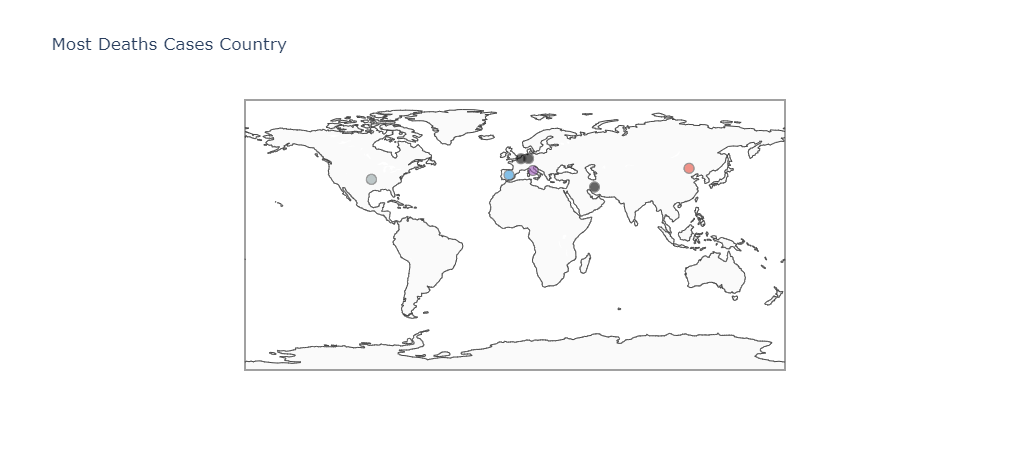

In [138]:
fig = go.Figure(data=go.Scattergeo(
        lon = long,
        lat = lat,
        text = countrynames,
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(255, 102, 255)'
            ),
            colorscale = colors,
            cmin = 0,
            color = colors,
        
        )))

fig.update_layout(
        title = 'Most Deaths Cases Country',
        geo = dict(
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        )

    )
fig.show()

In [152]:
long , lat = rcs['Long'], rcs['Lat']
countrynames = rcs['Country/Region']

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

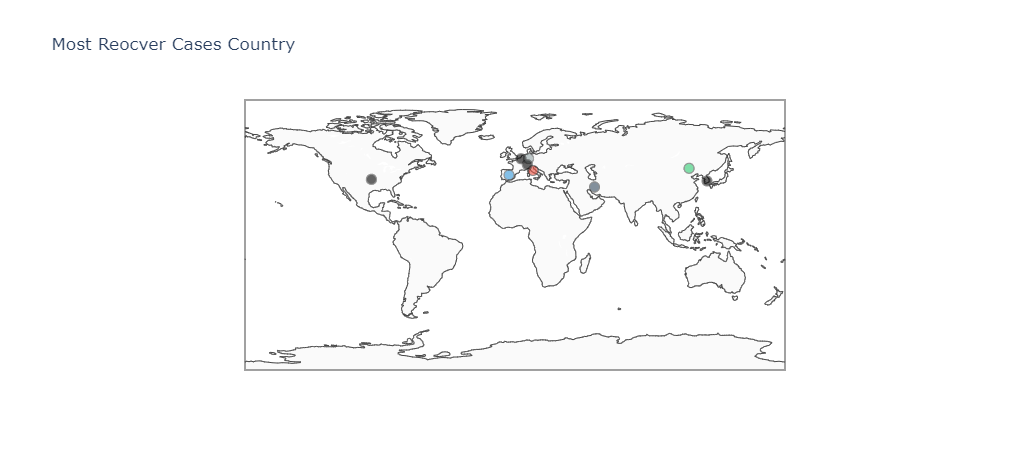

In [154]:
fig = go.Figure(data=go.Scattergeo(
        lon = long,
        lat = lat,
        text = countrynames,
        mode = 'markers',
        marker = dict(
            size = 10,
            opacity = 0.6,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(255, 102, 255)'
            ),
            colorscale = colors,
            cmin = 0,
            cmax = 
            color = colors,
        
        )))

fig.update_layout(
        title = 'Most Reocver Cases Country',
        geo = dict(
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        )

    )
fig.show()